<a href="https://colab.research.google.com/github/sratnaparkhi/tensorflow/blob/main/stock_market_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas_datareader as pdr
key= "3a7d69c89e4f538bf9e96cc75c12d62ec76b0601"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-05-01 00:00:00+00:00,146.58,147.20,144.96,145.10,32818760,34.593441,34.739763,34.211115,34.244155,131275040,0.0,1.0
1,AAPL,2017-05-02 00:00:00+00:00,147.51,148.09,146.84,147.54,39752670,34.812924,34.949807,34.654802,34.820004,159010680,0.0,1.0
2,AAPL,2017-05-03 00:00:00+00:00,147.06,147.49,144.27,145.59,45142806,34.706723,34.808204,34.048272,34.359797,180571224,0.0,1.0
3,AAPL,2017-05-04 00:00:00+00:00,146.53,147.14,145.81,146.52,23275690,34.581641,34.725603,34.411718,34.579281,93102760,0.0,1.0
4,AAPL,2017-05-05 00:00:00+00:00,148.96,148.98,146.76,146.76,26787359,35.155130,35.159850,34.635922,34.635922,107149436,0.0,1.0


In [ ]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,192.025437,193.949726,189.862636,191.820185,5.472864e+07,82.152454,83.025024,81.203189,82.097542,1.197694e+08,0.009102,1.002385
std,68.333216,69.032979,67.277276,68.032067,4.037958e+07,45.538066,46.082603,44.957372,45.526522,5.515484e+07,0.077803,0.084583
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,33.713666,34.005139,33.697079,33.862957,4.099995e+07,0.000000,1.000000
25%,149.177500,150.252500,147.855000,149.047500,2.546070e+07,42.780344,43.226012,42.531679,42.810187,8.347511e+07,0.000000,1.000000
50%,172.795000,174.370000,171.320000,172.560000,3.794050e+07,59.593330,60.314516,58.450462,59.328931,1.048337e+08,0.000000,1.000000
75%,209.557500,211.997500,207.605000,209.870000,7.656813e+07,124.741082,125.930602,123.394086,124.663701,1.399190e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,181.778019,182.706834,178.891703,182.397229,4.268849e+08,0.820000,4.000000


In [ ]:
df1 = df.reset_index()['close']
df1.head()

0    146.58
1    147.51
2    147.06
3    146.53
4    148.96
Name: close, dtype: float64

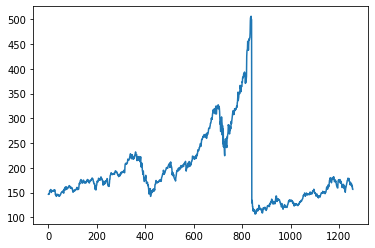

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

df1

array([[0.10042757],
       [0.101866  ],
       [0.10164919],
       ...,
       [0.14036318],
       [0.12643795],
       [0.12455855]])

In [ ]:
# split the dataset between train and test
train_size = int(len(df1) *0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]
int(len(df1) *0.65)

441

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100     
		dataX.append(a)    
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
#print(X_train)
X_train.shape,y_train.shape

((716, 100), (716,))

In [ ]:
# reshape
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# let create model
model = Sequential()
model.add(LSTM(50,return_sequences= True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 341ms/step - loss: 0.0302 - val_loss: 0.0016
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0025 - val_loss: 6.5957e-04
Epoch 4/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0014 - val_loss: 3.8925e-04
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0012 - val_loss: 2.7613e-04
Epoch 6/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0010 - val_loss: 2.8202e-04
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0011 - val_loss: 3.1863e-04
Epoch 8/100
12/12 [==============================] - 2s 193ms/step - loss: 9.9650e-04 - val_loss: 2.6776e-04
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0011 - val_loss: 2.8733e-04
Epoch 10/100
12/12 [==============================] - 2s 1

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error(y_train,train_predict))

220.5765946224253

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

147.89253693419113

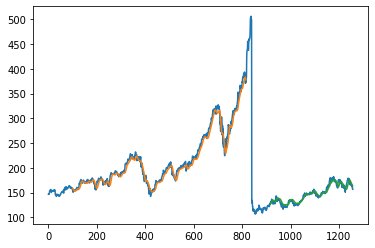

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13872387]
101
1 day input [0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181
 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604 0.15769568
 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732
 0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

1258

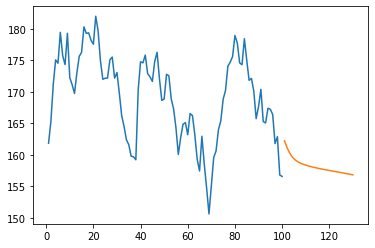

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

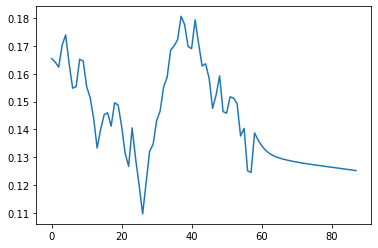

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

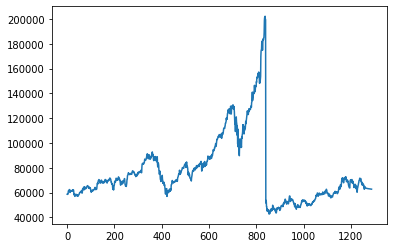

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)